In [ ]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!unzip '/content/gdrive/MyDrive/model prediction/dataset/chest-xray-pneumonia.zip'



Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [ ]:
import os, shutil
import random
import numpy as np
import pandas as pd
import cv2
import skimage
import matplotlib.pyplot as plt
import skimage.segmentation
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import tensorflow_hub as hub


In [ ]:


labels = ['PNEUMONIA', 'NORMAL']
img_size = 128

def get_data(data_dir):
    data = []  
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_path = os.path.join(path, img)  
                data.append([img_path, label])  
            except Exception as e:
                print(e)
    return pd.DataFrame(data, columns=['filepath', 'label'])

In [ ]:
train = get_data("/content/chest_xray/train")
test = get_data("/content/chest_xray/test")
val = get_data("/content/chest_xray/val")

In [ ]:
train.head(5)

,filepath,label
0,/content/chest_xray/train/PNEUMONIA/person1579...,PNEUMONIA
1,/content/chest_xray/train/PNEUMONIA/person258_...,PNEUMONIA
2,/content/chest_xray/train/PNEUMONIA/person361_...,PNEUMONIA
3,/content/chest_xray/train/PNEUMONIA/person397_...,PNEUMONIA
4,/content/chest_xray/train/PNEUMONIA/person486_...,PNEUMONIA


In [ ]:
print(f"The shape of The Train data is: {train.shape}")
print(f"The shape of The Test data is: {test.shape}")
print(f"The shape of the The Valid data is: {val.shape}")


The shape of The Train data is: (5216, 2)
The shape of The Test data is: (624, 2)
The shape of the The Valid data is: (16, 2)


In [ ]:
data_dir = "/content/chest_xray/train"
test_dir = "/content/chest_xray/test"
val_dir = "/content/chest_xray/val"

IMAGE_SIZE = (256,256)

print('Training Images:')
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset='training',
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=32)

#Testing  Data
print('Validation Images:')
validation_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    validation_split=0.9,
    subset='validation',
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=32)

print('Testing Images:')
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    seed=123,

    image_size=IMAGE_SIZE,
    batch_size=32)




Training Images:
Found 5216 files belonging to 2 classes.
Using 4695 files for training.
Validation Images:
Found 16 files belonging to 2 classes.
Using 14 files for validation.
Testing Images:
Found 624 files belonging to 2 classes.


In [ ]:
train_labels = train_ds.class_names
test_labels = test_ds.class_names
validation_labels = validation_ds.class_names


class_labels = ['NORMAL', 'PNEUMONIA']


label_encoder = LabelEncoder()

label_encoder.fit(class_labels)
train_labels_encoded = label_encoder.transform(train_labels)

validation_labels_encoded = label_encoder.transform(validation_labels)

test_labels_encoded = label_encoder.transform(test_labels)

In [ ]:

for image_batch, labels_batch in train_ds:
    print("Shape of X_train: ", image_batch.shape)
    print("Shape of y_train: ", labels_batch.shape)
    break

Shape of X_train:  (32, 256, 256, 3)
Shape of y_train:  (32,)


In [ ]:

train_ds = train_ds.map(lambda x, y: (x / 255.0, y))

validation_ds = validation_ds.map(lambda x, y: (x / 255.0, y))

test_ds = test_ds.map(lambda x, y: (x / 255.0, y))

<ipython-input-14-147ea82335d6>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")


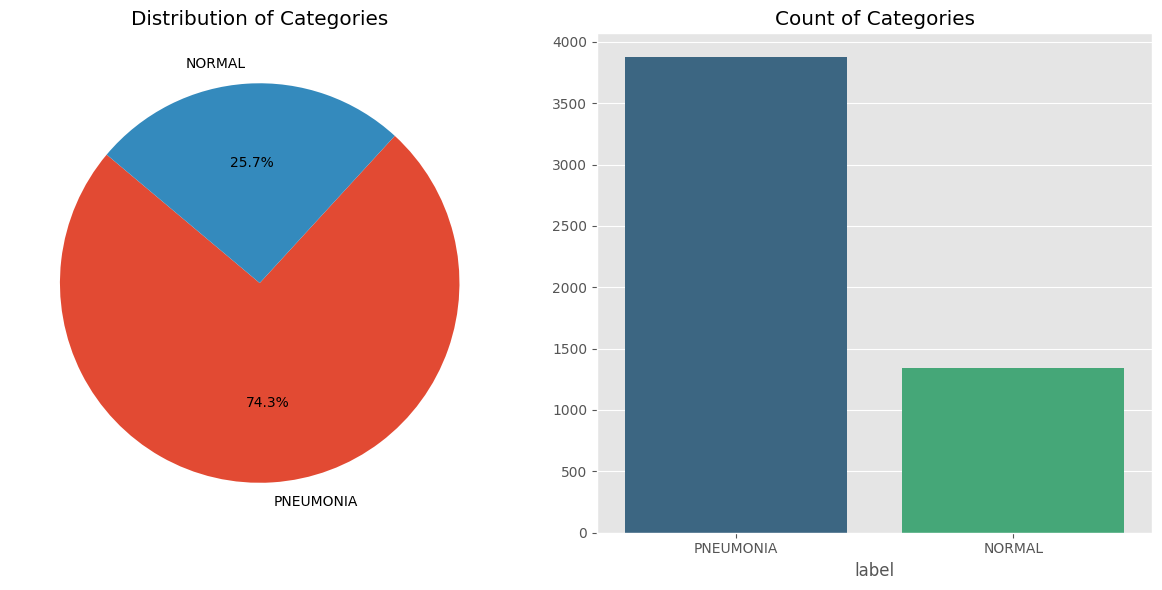

In [ ]:
count = train['label'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')

plt.tight_layout()

plt.show()

<ipython-input-15-d12bf52998c9>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="pastel")


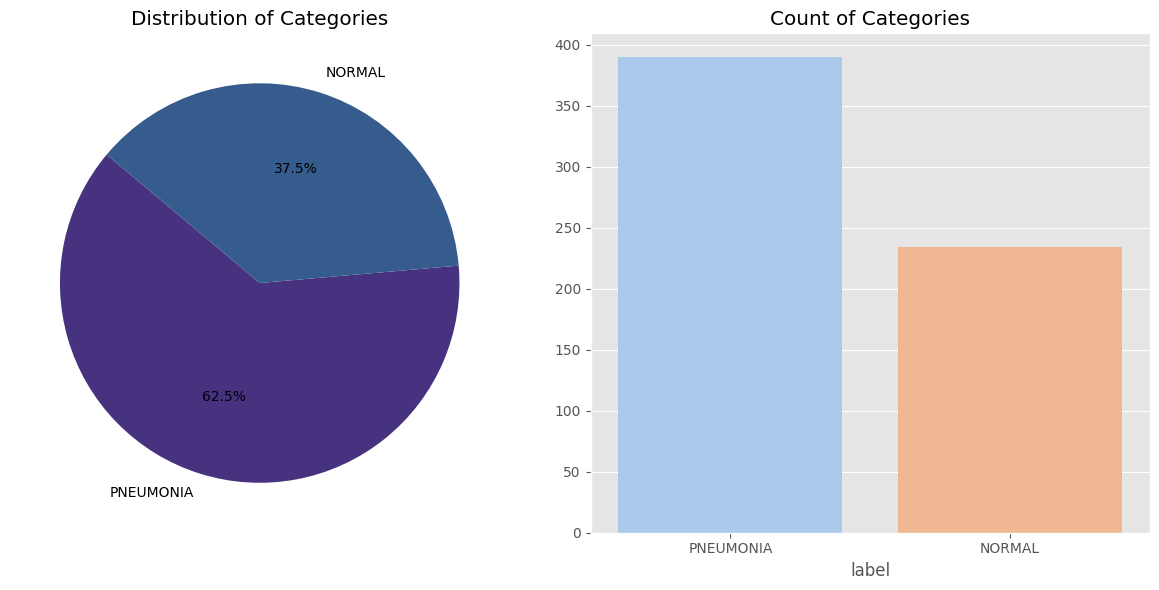

In [ ]:
count = test['label'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')
palette = sns.color_palette("pastel")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="pastel")
axs[1].set_title('Count of Categories')

plt.tight_layout()

plt.show()

In [ ]:
pneumonia = os.listdir("chest_xray/train/PNEUMONIA")
penomina_dir = "chest_xray/train/PNEUMONIA"

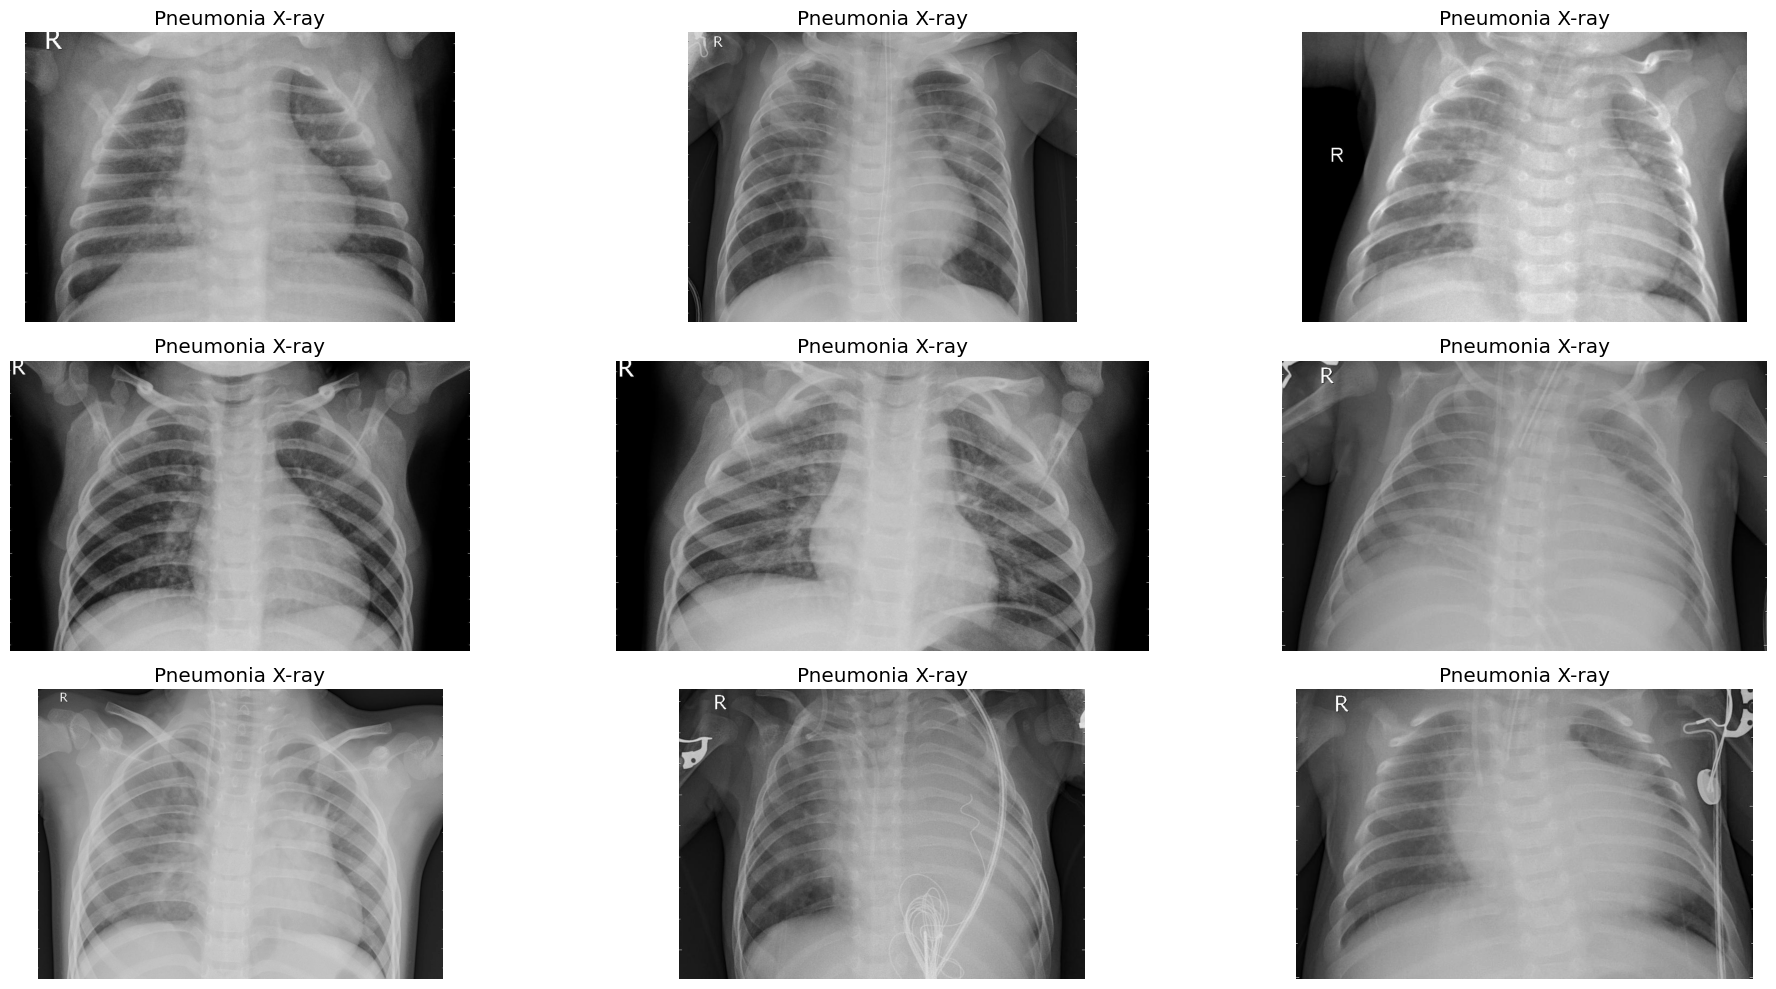

In [ ]:

plt.figure(figsize=(20,10))

for i in range(9):
    plt.subplot(3,3, i+1)
    img = plt.imread(os.path.join(penomina_dir, pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis("off")
    plt.title("Pneumonia X-ray")
plt.tight_layout()

In [ ]:


normal = os.listdir("chest_xray/train/NORMAL")
normal_dir = "chest_xray/train/NORMAL"

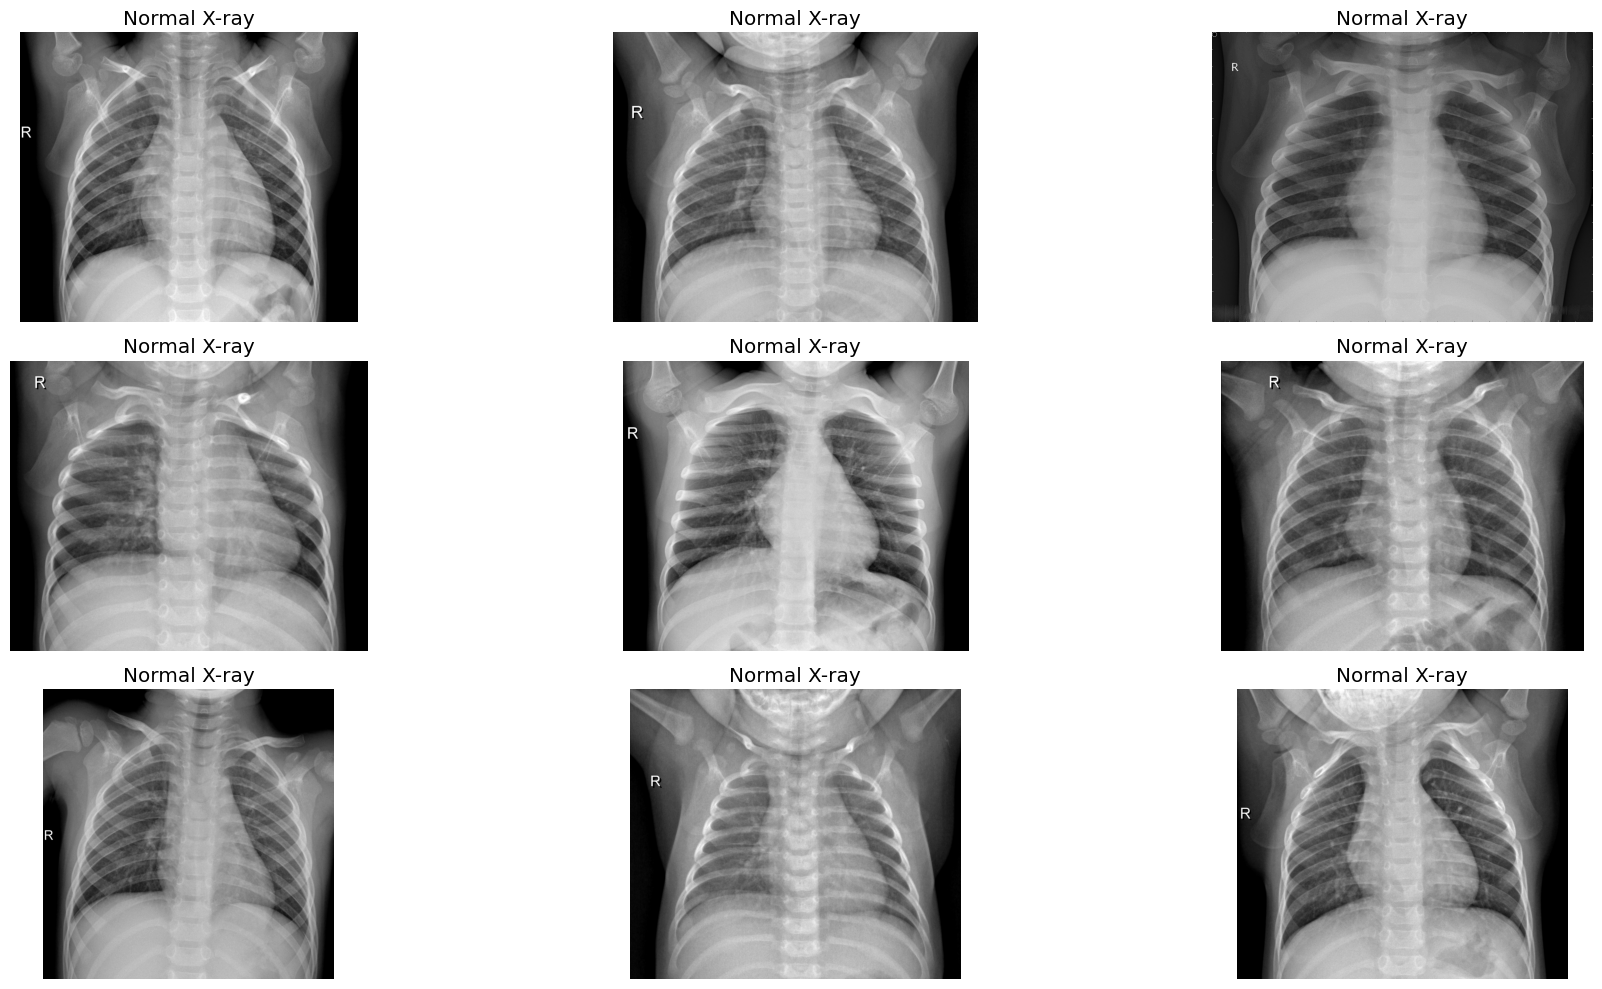

In [ ]:
plt.figure(figsize=(20,10))

for i in range(9):
    plt.subplot(3,3, i+1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis("off")
    plt.title("Normal X-ray")
plt.tight_layout()

In [ ]:
os.makedirs("/content/chest_xray/training_batches")

In [ ]:
import os
import shutil


os.makedirs("/content/chest_xray/training_batches/NORMAL")

count = 0
for filename in os.listdir("/content/chest_xray/train/NORMAL"):
    src = os.path.join("/content/chest_xray/train/NORMAL", filename)
    dst = os.path.join("/content/chest_xray/training_batches/NORMAL", '(1)'+filename)
    shutil.copy(src, dst)
    count+=1
print(count)

count = 0
for filename in os.listdir("/content/chest_xray/train/NORMAL"):
    src = os.path.join("/content/chest_xray/train/NORMAL", filename)
    dst = os.path.join("/content/chest_xray/training_batches/NORMAL", '(2)'+filename)
    shutil.copy(src, dst)
    count+=1
print(count)
count = 0
for filename in os.listdir("/content/chest_xray/train/NORMAL"):
    if count==1193:
      break
    src = os.path.join("/content/chest_xray/train/NORMAL", filename)
    dst = os.path.join("/content/chest_xray/training_batches/NORMAL", '(3)'+filename)
    shutil.copy(src, dst)
    count+=1
print(count)

1341
1341
1193


In [ ]:
import shutil

os.makedirs("/content/chest_xray/training_batches/PNEUMONIA")

for filename in os.listdir("/content/chest_xray/train/PNEUMONIA"):
  src = src = os.path.join("/content/chest_xray/train/PNEUMONIA", filename)
  dst = os.path.join("/content/chest_xray/training_batches/PNEUMONIA", filename)
  shutil.copy(src, dst)



In [ ]:
import glob
print("After oversampling")
jpeg_files = glob.glob("/content/chest_xray/training_batches/**/*.jpeg")
print(len(jpeg_files))

jpeg_files = glob.glob("/content/chest_xray/training_batches/NORMAL/*")
print("Normal:",len(jpeg_files))
jpeg_files = glob.glob("/content/chest_xray/training_batches/PNEUMONIA/*")
print("Pneumonia:",len(jpeg_files))


After oversampling
7750
Normal: 3875
Pneumonia: 3875


In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import pandas as pd
import seaborn as sns
import cv2

In [ ]:
def retrieveNumberOfFiles(path):
    list1 = []
    for file_name in glob.iglob(path+'/**/*.jpeg', recursive=True):
        list1.append(file_name)
    return len(list1)

In [ ]:
TRAIN_PATH = "/content/chest_xray/train"
TEST_PATH = "/content/chest_xray/test"
VAL_PATH = "/content/chest_xray/val"

In [ ]:
totalTrain = retrieveNumberOfFiles(TRAIN_PATH)
totalVal = retrieveNumberOfFiles(VAL_PATH)
totalTest = retrieveNumberOfFiles(TEST_PATH)

In [ ]:
def getAllFiles(path):
    list1 = []
    for file_name in glob.iglob(path+'/**/*.jpeg', recursive=True):
        list1.append(file_name)
    return list1

In [ ]:
#all files
allTrainFiles = getAllFiles(TRAIN_PATH)


In [ ]:
trainLabels = [0 if p.split(os.path.sep)[-2] == "NORMAL" else 1 for p in allTrainFiles]
trainLabels = to_categorical(trainLabels)
classTotals = trainLabels.sum(axis=0)
classWeight = dict()

print(trainLabels)
for i in range(0, len(classTotals)):
    classWeight[i] = classTotals.max() / classTotals[i]

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:
valAug = ImageDataGenerator(preprocessing_function=preprocess_input)
BATCH_SIZE = 16
INIT_LR = 1e-4
EPOCHS = 20


In [ ]:

trainAug = ImageDataGenerator(
	preprocessing_function=preprocess_input,
	rotation_range=30,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	vertical_flip=True,
	fill_mode="nearest")

In [ ]:
# Initialize the training generator
trainGen = trainAug.flow_from_directory(
	TRAIN_PATH,
	class_mode="categorical",
	target_size=(224, 224),
	color_mode="rgb",
	shuffle=True,
	batch_size=BATCH_SIZE)

Found 5216 images belonging to 2 classes.


In [ ]:
# Initialize the validation generator
valGen = valAug.flow_from_directory(
	VAL_PATH,
	class_mode="categorical",
	target_size=(224, 224),
	color_mode="rgb",
	shuffle=False,
	batch_size=BATCH_SIZE)

Found 16 images belonging to 2 classes.


In [ ]:
# Initialize the testing generator
testGen = valAug.flow_from_directory(
	TEST_PATH,
	class_mode="categorical",
	target_size=(224, 224),
	color_mode="rgb",
	shuffle=False,
	batch_size=BATCH_SIZE)

Found 624 images belonging to 2 classes.


In [ ]:
# Loading the MobileNetV2
baseModel = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
CLASSES = ["normal","pneumonia"]
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(len(CLASSES), activation="softmax")(headModel)

In [ ]:
model = Model(inputs=baseModel.input, outputs=headModel)

In [ ]:
for layer in baseModel.layers:
    layer.trainable = False

In [ ]:
print("Compiling model")
opt = Adam(learning_rate=INIT_LR,)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

Compiling model


In [ ]:
MCName = os.path.sep.join(["/content/out", "weights-{epoch:03d}-{val_loss:.4f}.hdf5"])
checkpoint = ModelCheckpoint(MCName, monitor="val_loss", mode="min", save_best_only=True, verbose=1)
callbacks = [checkpoint]

In [78]:
print("Model Fitting")
MF = model.fit(
    x=trainGen,
    steps_per_epoch=totalTrain // BATCH_SIZE,
    validation_data=valGen,
    validation_steps=totalVal // BATCH_SIZE,
    class_weight=classWeight,
    callbacks=callbacks,
    epochs=EPOCHS)

Model Fitting
Epoch 1/20
326/326 [==============================] - ETA: 0s - loss: 0.5783 - accuracy: 0.8453
Epoch 1: val_loss improved from inf to 0.39668, saving model to /content/out/weights-001-0.3967.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


326/326 [==============================] - 309s 932ms/step - loss: 0.5783 - accuracy: 0.8453 - val_loss: 0.3967 - val_accuracy: 0.8125
Epoch 2/20
326/326 [==============================] - ETA: 0s - loss: 0.3622 - accuracy: 0.9039
Epoch 2: val_loss improved from 0.39668 to 0.32051, saving model to /content/out/weights-002-0.3205.hdf5
326/326 [==============================] - 306s 939ms/step - loss: 0.3622 - accuracy: 0.9039 - val_loss: 0.3205 - val_accuracy: 0.8125
Epoch 3/20
326/326 [==============================] - ETA: 0s - loss: 0.3154 - accuracy: 0.9191
Epoch 3: val_loss improved from 0.32051 to 0.29996, saving model to /content/out/weights-003-0.3000.hdf5
326/326 [==============================] - 304s 931ms/step - loss: 0.3154 - accuracy: 0.9191 - val_loss: 0.3000 - val_accuracy: 0.8125
Epoch 4/20
326/326 [==============================] - ETA: 0s - loss: 0.2950 - accuracy: 0.9202
Epoch 4: val_loss did not improve from 0.29996
326/326 [==============================] - 311s 95

In [79]:
# Load the best performing model
path1 = '/content/out/weights-010-0.2456.hdf5'
fModel = load_model(path1)

In [81]:
# Prediction on the test data
print("Predicting on the test data")
predTest = fModel.predict(x=testGen, steps=(totalTest // BATCH_SIZE) + 1)
predTest = np.argmax(predTest, axis=1)

Predicting on the test data
39/40 [============================>.] - ETA: 1s

40/40 [==============================] - 44s 1s/step


In [92]:
score = fModel.evaluate(testGen,batch_size=BATCH_SIZE)
print("Accuracy: {:.2f}%".format(score[1] * 100))
print("Loss: ",score[0])

39/39 [==============================] - 29s 708ms/step - loss: 0.2247 - accuracy: 0.9151
Accuracy: 91.51%
Loss:  0.22474029660224915


In [82]:
print(classification_report(testGen.classes, predTest, target_names=testGen.class_indices.keys()))

              precision    recall  f1-score   support

      NORMAL       0.86      0.92      0.89       234
   PNEUMONIA       0.95      0.91      0.93       390

    accuracy                           0.92       624
   macro avg       0.91      0.92      0.91       624
weighted avg       0.92      0.92      0.92       624



[[215  19]
 [ 34 356]]
acc: 0.9151
sensitivity: 0.9188
specificity: 0.9128


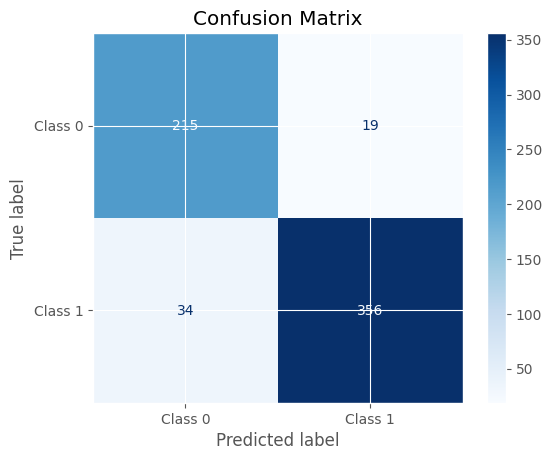

In [88]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(testGen.classes, predTest)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

#Confusion matrix
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)  
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

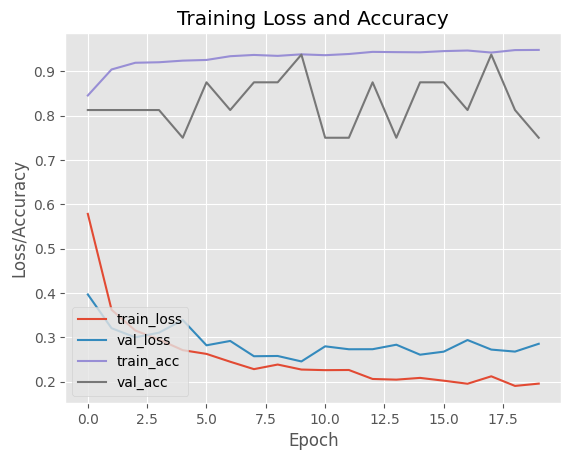

In [86]:
PLOT_PATH = os.path.sep.join(['/content/out', "TrainingHistoryPlot.png"])
def training_plot(H, N, plotPath):
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Loss/Accuracy")
    plt.legend(loc="lower left")
    plt.savefig(plotPath)
training_plot(MF, EPOCHS, PLOT_PATH)